In [20]:
# !pip install gdown

# Importing libraries & dataset

In [31]:
import gdown
import pandas as pd
import pprint
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1

In [ ]:


# # link of the csv
# url = "https://drive.google.com/file/d/1lI54yKV8WM0n2kGLLALOKe2suC_Wq9S8/view"

# # Convert to direct download link
# file_id = url.split("/d/")[1].split("/")[0]
# download_url = f"https://drive.google.com/uc?id={file_id}"

In [ ]:
# # Download file into the current directory
# gdown.download(download_url, "game_events.csv", quiet=False)

In [4]:
# Read with pandas

df = pd.read_csv("game_events.csv")
df

,player_id,session_id,event_type,event_time,level,revenue_usd
0,P065,S1329,ad_watch,2025-07-02 16:07:00,10,0.05
1,P065,S1329,end_game,2025-07-02 16:11:00,3,0.00
2,P065,S1329,ad_watch,2025-07-02 16:13:00,17,0.05
3,P065,S1329,end_game,2025-07-02 16:22:00,3,0.00
4,P065,S1329,purchase,2025-07-02 16:19:00,11,1.99
...,...,...,...,...,...,...
1976,P008,S9998,ad_watch,2025-07-05 16:02:00,13,0.05
1977,P009,S3253,level_up,2025-07-01 08:41:00,1,0.00
1978,P009,S3253,end_game,2025-07-01 08:45:00,17,0.00
1979,P009,S3253,purchase,2025-07-01 08:51:00,17,4.99


# Exploring data

In [18]:
# Check for missing values
print(df.isnull())

      player_id  session_id  event_type  event_time  level  revenue_usd
0         False       False       False       False  False        False
1         False       False       False       False  False        False
2         False       False       False       False  False        False
3         False       False       False       False  False        False
4         False       False       False       False  False        False
...         ...         ...         ...         ...    ...          ...
1976      False       False       False       False  False        False
1977      False       False       False       False  False        False
1978      False       False       False       False  False        False
1979      False       False       False       False  False        False
1980      False       False       False       False  False        False

[1981 rows x 6 columns]


In [19]:
# Count missing values in each column
missing_per_column = df.isnull().sum()
print(missing_per_column)

player_id      0
session_id     0
event_type     0
event_time     0
level          0
revenue_usd    0
dtype: int64


In [33]:
print(df.dtypes)

player_id              object
session_id             object
event_type             object
event_time     datetime64[ns]
level                   int64
revenue_usd           float64
dtype: object


In [53]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
event_time,1981,2025-07-04 14:00:30.257445632,2025-07-01 00:07:00,2025-07-02 14:32:00,2025-07-04 20:10:00,2025-07-06 08:02:00,2025-07-07 23:39:00,NaN
level,1981.0,10.519939,1.0,5.0,11.0,15.0,20.0,5.752578
revenue_usd,1981.0,0.857562,0.0,0.0,0.0,0.05,9.99,2.271643


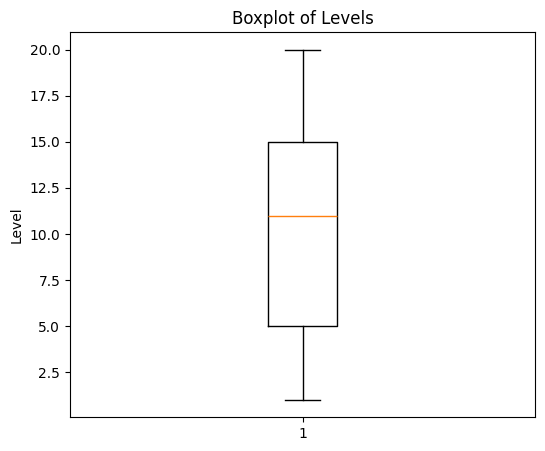

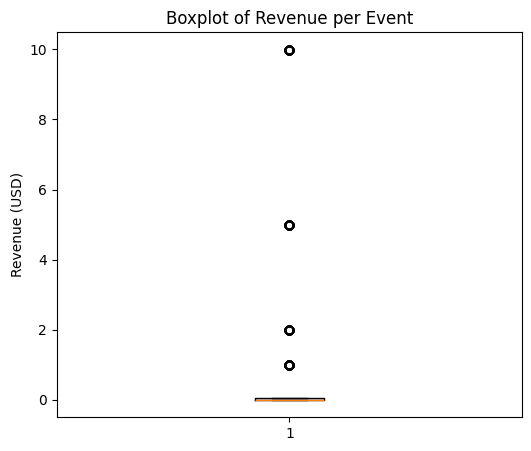

In [34]:
# Boxplot for levels
plt.figure(figsize=(6, 5))
plt.boxplot(df["level"], vert=True)
plt.ylabel("Level")
plt.title("Boxplot of Levels")
plt.show()

# Boxplot for revenue 
plt.figure(figsize=(6, 5))
plt.boxplot(df["revenue_usd"], vert=True)
plt.ylabel("Revenue (USD)")
plt.title("Boxplot of Revenue per Event")
plt.show()

In [37]:
print(df[["level", "revenue_usd"]].describe().T)

              count       mean       std  min  25%   50%    75%    max
level        1981.0  10.519939  5.752578  1.0  5.0  11.0  15.00  20.00
revenue_usd  1981.0   0.857562  2.271643  0.0  0.0   0.0   0.05   9.99


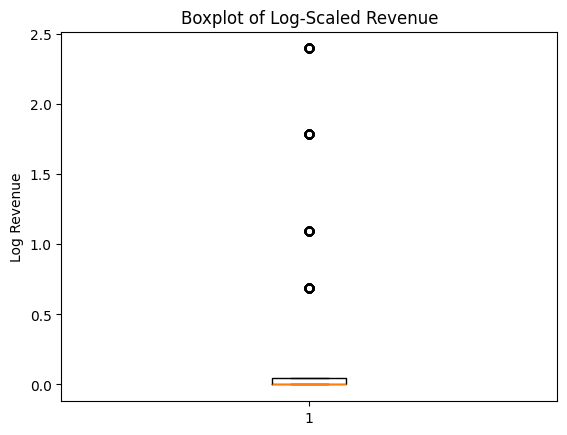

In [36]:
plt.boxplot(np.log1p(df["revenue_usd"]))  # log1p handles zeros safely because have a lot of zeros
plt.ylabel("Log Revenue")
plt.title("Boxplot of Log-Scaled Revenue")
plt.show()

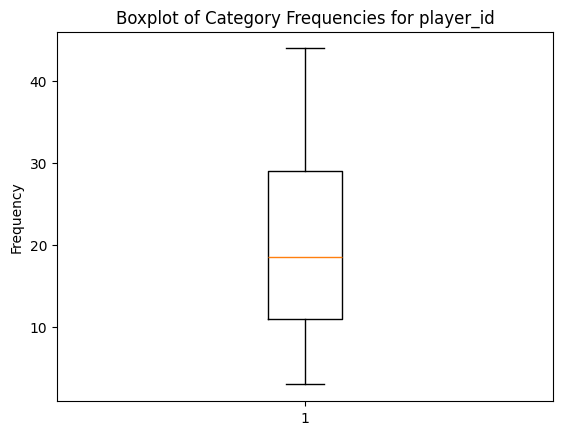

In [56]:
# Count frequency of each category
counts = df['player_id'].value_counts()

# Plot as boxplot of counts
plt.boxplot(counts)
plt.title('Boxplot of Category Frequencies for player_id')
plt.ylabel('Frequency')
plt.show()

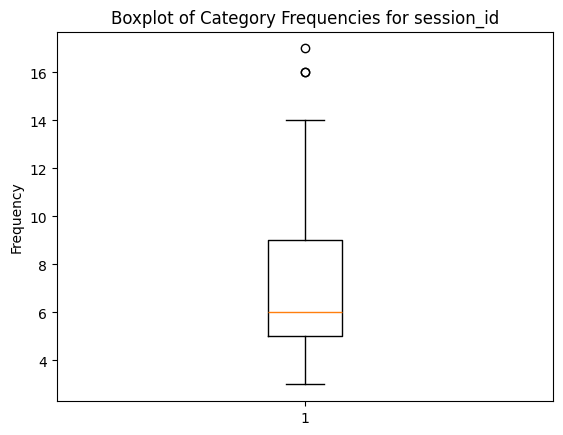

In [60]:
# Count frequency of each category
counts = df['session_id'].value_counts()

# Plot as boxplot of counts
plt.boxplot(counts)
plt.title('Boxplot of Category Frequencies for session_id')
plt.ylabel('Frequency')
plt.show()

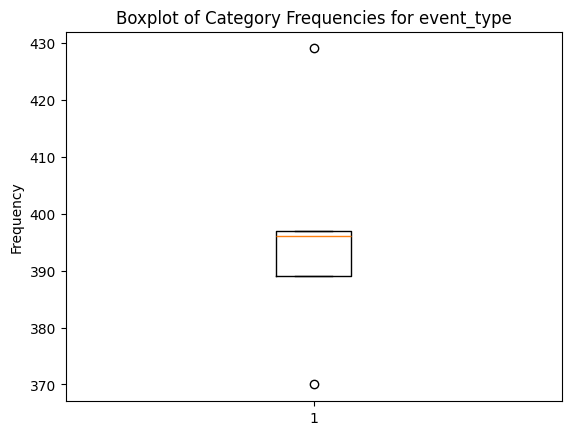

In [59]:
# Count frequency of each category
counts = df['event_type'].value_counts()

# Plot as boxplot of counts
plt.boxplot(counts)
plt.title('Boxplot of Category Frequencies for event_type')
plt.ylabel('Frequency')
plt.show()

In [6]:
unique_users = list(df["player_id"].unique())

In [8]:
print(unique_users)

['P065', 'P066', 'P006', 'P097', 'P032', 'P053', 'P044', 'P033', 'P095', 'P063', 'P017', 'P067', 'P075', 'P035', 'P028', 'P056', 'P020', 'P050', 'P093', 'P091', 'P054', 'P082', 'P023', 'P043', 'P092', 'P034', 'P061', 'P072', 'P089', 'P037', 'P080', 'P002', 'P004', 'P019', 'P069', 'P012', 'P011', 'P047', 'P083', 'P036', 'P074', 'P077', 'P059', 'P071', 'P090', 'P078', 'P013', 'P041', 'P060', 'P088', 'P015', 'P081', 'P058', 'P007', 'P040', 'P079', 'P016', 'P085', 'P024', 'P048', 'P005', 'P100', 'P051', 'P094', 'P086', 'P049', 'P064', 'P045', 'P009', 'P022', 'P026', 'P096', 'P031', 'P018', 'P068', 'P014', 'P021', 'P087', 'P046', 'P084', 'P070', 'P010', 'P076', 'P025', 'P030', 'P057', 'P029', 'P039', 'P073', 'P052', 'P001', 'P055', 'P003', 'P062', 'P008', 'P038']


In [7]:
values = list(df["event_type"].unique())
values

['ad_watch', 'end_game', 'purchase', 'start_game', 'level_up']

# 1

In [26]:

# Filter rows to only include start_game and end_game events
log_df = df[df["event_type"].isin(["start_game", "end_game"])]
# Sort so events are in the correct order for each player
log_df = log_df.sort_values(by=["player_id", "event_time"])

In [27]:
#  Build user_login_dict
user_login_dict = {}

# Get unique players manually
unique_players = log_df["player_id"].unique()

for user in unique_players:
    user_rows = log_df[log_df["player_id"] == user]

    session_id = 0
    sub_login_dict = {}
    login_time = None

    # Go through each row one by one
    for i in range(len(user_rows)):
        row = user_rows.iloc[i] 
        if row["event_type"] == "start_game":
            login_time = row["event_time"]
        elif row["event_type"] == "end_game" and login_time is not None:
            sub_login_dict[session_id] = {
                "login_dt": login_time,
                "logout_dt": row["event_time"],
            }
            session_id += 1
            login_time = None  

    # Add to final dictionary if user has at least one complete session
    if len(sub_login_dict) > 0:
        user_login_dict[user] = sub_login_dict

In [28]:
# Calculate average session length per player
avg_session_length_per_player = {}

for user in user_login_dict:
    sessions = user_login_dict[user]
    session_lengths_min = []

    for session_id in sessions:
        login_dt = pd.to_datetime(sessions[session_id]["login_dt"])
        logout_dt = pd.to_datetime(sessions[session_id]["logout_dt"])
        session_length_min = (logout_dt - login_dt).total_seconds() / 60
        session_lengths_min.append(session_length_min)

    avg_min = sum(session_lengths_min) / len(session_lengths_min)
    avg_hr = avg_min / 60
    avg_session_length_per_player[user] = {
        "avg_minutes": avg_min,
        "avg_hours": avg_hr
    }

In [71]:

#  Build a list of dictionaries
rows = []

for user in avg_session_length_per_player:
    rows.append({
        "player_id": user,
        "avg_session_length_min": avg_session_length_per_player[user]["avg_minutes"],
        "avg_session_length_hr": avg_session_length_per_player[user]["avg_hours"]
    })

#  create the DataFrame all at once
avg_df = pd.DataFrame(rows)

#  Calculate overall average
overall_avg_min = avg_df["avg_session_length_min"].mean()
overall_avg_hr = overall_avg_min / 60

print("Overall average session length:", round(overall_avg_min, 2), "minutes (", round(overall_avg_hr, 2), "hours )")


Overall average session length: 574.3 minutes ( 9.57 hours )


In [73]:
avg_df

,player_id,avg_session_length_min,avg_session_length_hr
0,P001,3.000000,0.050000
1,P003,579.000000,9.650000
2,P005,2.000000,0.033333
3,P006,3.000000,0.050000
4,P008,16.000000,0.266667
...,...,...,...
72,P091,1601.333333,26.688889
73,P092,1632.000000,27.200000
74,P095,452.666667,7.544444
75,P097,1615.000000,26.916667


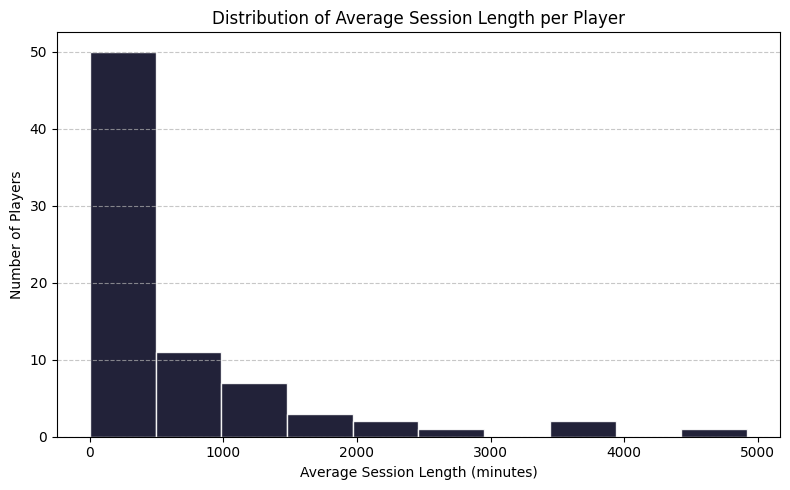

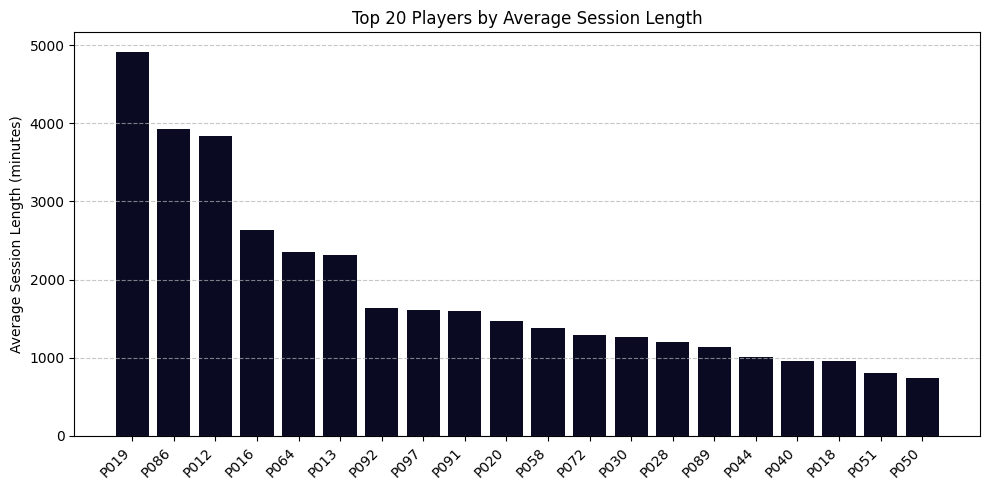

In [75]:
# Histogram for average session length in minutes
plt.figure(figsize=(8, 5))
plt.hist(
    avg_df["avg_session_length_min"],
    bins=10,
    color="#0a0a23",          
    edgecolor="white",        
    alpha=0.9                 
)
plt.xlabel("Average Session Length (minutes)")
plt.ylabel("Number of Players")
plt.title("Distribution of Average Session Length per Player")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Bar chart of top 20 players with highest average session length
top_players = avg_df.sort_values(by="avg_session_length_min", ascending=False).head(20)

plt.figure(figsize=(10, 5))
plt.bar(
    top_players["player_id"],
    top_players["avg_session_length_min"],
    color="#0a0a23"          # Fill color for bars
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Session Length (minutes)")
plt.title("Top 20 Players by Average Session Length")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# 2

In [10]:
# Filter rows where level
filtered_df = df[(df['level'] ) & (df['event_type'] == 'end_game')]

filtered_df.value_counts("level")

level
17    28
3     27
9     26
11    22
5     19
7     18
13    18
15    18
19    16
1     13
Name: count, dtype: int64

In [92]:
# Filter to only start_game events
start_df = df[df['event_type'] == 'start_game']

# Count unique players who started each level
level_players = start_df.groupby("level")["player_id"].nunique().sort_index()

# Compute drop-off = number of players who did NOT start the next level
drop_off = level_players - level_players.shift(-1)

# Remove last level and ensure drop-off is non-negative
drop_off = drop_off.dropna().clip(lower=0)

# Sort by largest drop-off to find top 3 levels
top_dropoff_levels = drop_off.sort_values(ascending=False).head(3)

print("Top 3 levels with highest drop-off:")
print(top_dropoff_levels)


Top 3 levels with highest drop-off:
level
16    12.0
7      9.0
12     9.0
Name: player_id, dtype: float64


# 3 


In [41]:
returning_users = []
new_users = []

for user, sessions in user_login_dict.items():
    if len(sessions) > 1:
        returning_users.append(user)
    else:
        new_users.append(user)

In [43]:
# Create a dict for revenue per user
revenue_per_user = {}
for index, row in df.iterrows():
    user = row['player_id']
    revenue = row['revenue_usd']
    if user in revenue_per_user:
        revenue_per_user[user] += revenue
    else:
        revenue_per_user[user] = revenue

In [45]:
# Returning users ARPU
total_revenue_returning = 0
for user in returning_users:
    if user in revenue_per_user:
        total_revenue_returning += revenue_per_user[user]

if len(returning_users) > 0:
    arpu_returning = total_revenue_returning / len(returning_users)
else:
    arpu_returning = 0

print("Returning user ARPU:", round(arpu_returning,2))

# New users ARPU
total_revenue_new = 0
for user in new_users:
    if user in revenue_per_user:
        total_revenue_new += revenue_per_user[user]

if len(new_users) > 0:
    arpu_new = total_revenue_new / len(new_users)
else:
    arpu_new = 0

print("New user ARPU:", arpu_new)


Returning user ARPU: 21.58
New user ARPU: 16.655


# 4

In [16]:
# Calculate the mode of column 'event_type'
mode_a = df['event_type'].mode()

print(mode_a)

0    end_game
Name: event_type, dtype: object


In [17]:
df['event_type'].value_counts()

event_type
end_game      429
purchase      397
ad_watch      396
start_game    389
level_up      370
Name: count, dtype: int64

In [47]:
avg_revenue_by_event = df.groupby('event_type')['revenue_usd'].mean()
avg_revenue_by_event

event_type
ad_watch      0.050000
end_game      0.000000
level_up      0.000000
purchase      4.229295
start_game    0.000000
Name: revenue_usd, dtype: float64

In [49]:
max_revenue = 0
most_valuable_event = None

for event, revenue in avg_revenue_by_event.items():
    if revenue > max_revenue:
        max_revenue = revenue
        most_valuable_event = event

print("Most valuable event type:", most_valuable_event)
print("Average revenue:", round(max_revenue,2))

Most valuable event type: purchase
Average revenue: 4.23


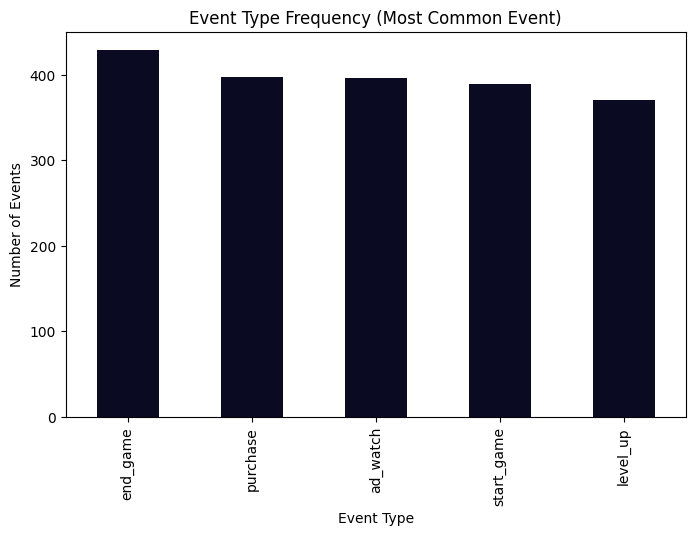

In [93]:
# Count occurrences of each event type
event_counts = df['event_type'].value_counts()

# Bar chart for event frequency
plt.figure(figsize=(8,5))
event_counts.plot(kind='bar', color="#0a0a23")
plt.title("Event Type Frequency (Most Common Event)")
plt.xlabel("Event Type")
plt.ylabel("Number of Events")
plt.show()

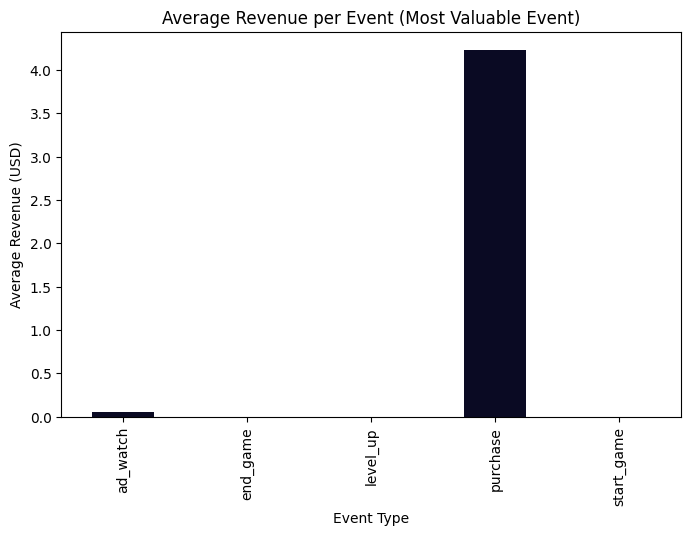

In [94]:
# Average revenue per event
avg_revenue_by_event = df.groupby('event_type')['revenue_usd'].mean()

# Bar chart for average revenue
plt.figure(figsize=(8,5))
avg_revenue_by_event.plot(kind='bar', color="#0a0a23")
plt.title("Average Revenue per Event (Most Valuable Event)")
plt.xlabel("Event Type")
plt.ylabel("Average Revenue (USD)")
plt.show()

In [64]:

# Load your data
df['event_time'] = pd.to_datetime(df['event_time'])

# Daily Active Users (DAU)
dau = df.groupby(df['event_time'].dt.date)['player_id'].nunique().reset_index()
dau.columns = ['date', 'DAU']

# Daily Revenue
daily_revenue = df.groupby(df['event_time'].dt.date)['revenue_usd'].sum().reset_index()
daily_revenue.columns = ['date', 'Revenue']

# Returning Users (users who played before that day)
first_play = df.groupby('player_id')['event_time'].min().reset_index()
first_play.columns = ['player_id', 'first_play_date']
df = df.merge(first_play, on='player_id')
df['returning'] = df['event_time'].dt.date > df['first_play_date'].dt.date
returning_users = df.groupby(df['event_time'].dt.date)['returning'].sum().reset_index()
returning_users.columns = ['date', 'Returning_Users']

# Combine
time_df = dau.merge(daily_revenue, on='date').merge(returning_users, on='date')

In [67]:
event_counts = df['event_type'].value_counts()


In [68]:
# Session duration in minutes
df_sessions = df.groupby('session_id')['event_time'].agg(['min','max']).reset_index()
df_sessions['session_length_min'] = (df_sessions['max'] - df_sessions['min']).dt.total_seconds()/60

# Average per player
avg_df = df_sessions.merge(df[['session_id','player_id']].drop_duplicates(), on='session_id')
avg_df = avg_df.groupby('player_id')['session_length_min'].mean().reset_index()
avg_df.columns = ['player_id','avg_session_length_min']

In [69]:
# Example: count how many players stopped at each level
level_max = df.groupby('player_id')['level'].max().reset_index()
churn_per_level = level_max['level'].value_counts().sort_index().reset_index()
churn_per_level.columns = ['level', 'players_left']